# Ames Housing Dataset: Exploratory Data Analysis
Ames Housing Dataset https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data"
 - train.csv

**M504 AI and Applications Project**

**Author:** Nadezda Tolokina ID GH1045338  
**Date:** 16.09.2025  

---

## Business Context

**Client:** *Ames Real Estate Investors* (AREI) is an investment company specializing in residential properties in Ames, Iowa. Their business model focuses on acquiring high-potential houses, conducting cost-effective renovations, and reselling them to maximize profit.  

**Data:** The client has provided a detailed dataset on house sales in Ames, consisting of **2,930 records** and **80 features** per property. These features cover a broad spectrum, ranging from floor area and number of rooms to material quality and neighborhood characteristics.  

**Need for Data Expertise:** Currently, AREI primarily relies on the experience and intuition of its agents. The company seeks to transition towards a data-driven strategy in order to:  
- More accurately estimate the market value of properties;  
- Identify key factors that influence price to optimize renovation investments;  
- Detect undervalued houses and promising neighborhoods for capital allocation;  
- Understand seasonal market trends to better plan buying and selling cycles.  

---

## Data Overview and Initial Exploration

The dataset represents a comprehensive collection of information on residential properties. Preliminary exploration reveals several key aspects:  

- **Data types:** The dataset contains a mixture of numerical (e.g., *GrLivArea* — above-ground living area) and categorical features (e.g., *Neighborhood*). The categorical variables can be further classified as nominal (e.g., *RoofStyle*) or ordinal (e.g., *OverallQual*). 
- **Target variable:** *SalePrice* is the primary variable of interest. Its distribution is expected to be right-skewed, which is typical of housing prices. A logarithmic transformation may be required for more accurate modeling.  
- **Data quality issues:** Missing values are expected. According to the dataset documentation, in many cases *NA* does not indicate missing data but rather the absence of a feature (e.g., *NA* in *PoolQC* signifies the absence of a pool). Such cases require careful handling. Outliers, such as properties with unusually large living areas but disproportionately low sale prices, must also be investigated.  

## Step 1: Environment Setup and Data Loading and Skewness Handling

1. Importing libraries
pandas (pd) – for working with tables (DataFrame), numpy (np) – for numerical operations, matplotlib.pyplot (plt) – for basic plotting, seaborn (sns) – for enhanced visualizations, scipy.stats (stats) – for statistical calculations (e.g., normality, correlations).
2. Setting graph style
The default graph style from Seaborn is set to whitegrid, which adds a light grid. This makes the graphs easier to read.
3. Loading and initial data analysis.
A CSV file named train.csv is loaded into the variable df (DataFrame).
The first 5 rows of the table are displayed to visually assess the structure and content.
Information about the DataFrame is displayed: number of rows and columns, column names, data types, and number of missing values.
Basic statistics for numerical columns are displayed: mean, standard deviation, minimum, maximum, quartile values, etc.

In [1]:
# Import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Set the style for plots
sns.set_style('whitegrid')

# Load the dataset
df = pd.read_csv('train.csv')

# Display the first 5 rows of the dataframe
print("First 5 rows of the dataset:")
display(df.head())

# Display basic information about the dataframe
print("\nDataset Info:")
df.info()

# Display descriptive statistics
print("\nDescriptive Statistics:")
display(df.describe())

First 5 rows of the dataset:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## SkewnessTransformer class is designed to handle highly skewed features in the dataset — numerical columns whose distributions deviate strongly from normality.
- Finds numeric features with strong skewness.
- Applies a logarithmic transformation (`log1p`) to reduce skewness.
- Produces distributions that are closer to normal.
- Helps machine learning models perform better with less skewed data.


In [2]:
# Transform skewed features
class SkewnessTransformer:
    def __init__(self, skew_threshold=0.5):
        self.skew_threshold = skew_threshold
        self.skewed_features = None

    def identify_skewed_features(self, df, numeric_feats):
        skewed_feats = df[numeric_feats].skew().sort_values(ascending=False)
        self.skewed_features = skewed_feats[abs(skewed_feats) > self.skew_threshold]
        return self.skewed_features

    def transform(self, df):
        for feat in self.skewed_features.index:
            if feat in df.columns:
                df[feat] = np.log1p(df[feat])
        return df

# Get numeric features
numeric_feats = df.dtypes[df.dtypes != "object"].index

# Create and use the transformer
transformer = SkewnessTransformer()
high_skew = transformer.identify_skewed_features(df, numeric_feats)
print("Features with high skewness:")
print(high_skew)

df = transformer.transform(df)

Features with high skewness:
MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.669084
OpenPorchSF       2.364342
LotFrontage       2.163569
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
OverallCond       0.693067
TotRmsAbvGrd      0.676341
HalfBath          0.675897
Fireplaces        0.649565
BsmtFullBath      0.596067
YearRemodAdd     -0.503562
YearBuilt        -0.613461
GarageYrBlt      -0.649415
dtype: float64


## Step 2: Primary EDA - Analysis of missing values

- Analyzing and visualizing the gaps.
- Dividing the signs into two categories depending on the meaning of the gaps.
- Filling in all missing values in a logical manner.

Missing values information:


,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945


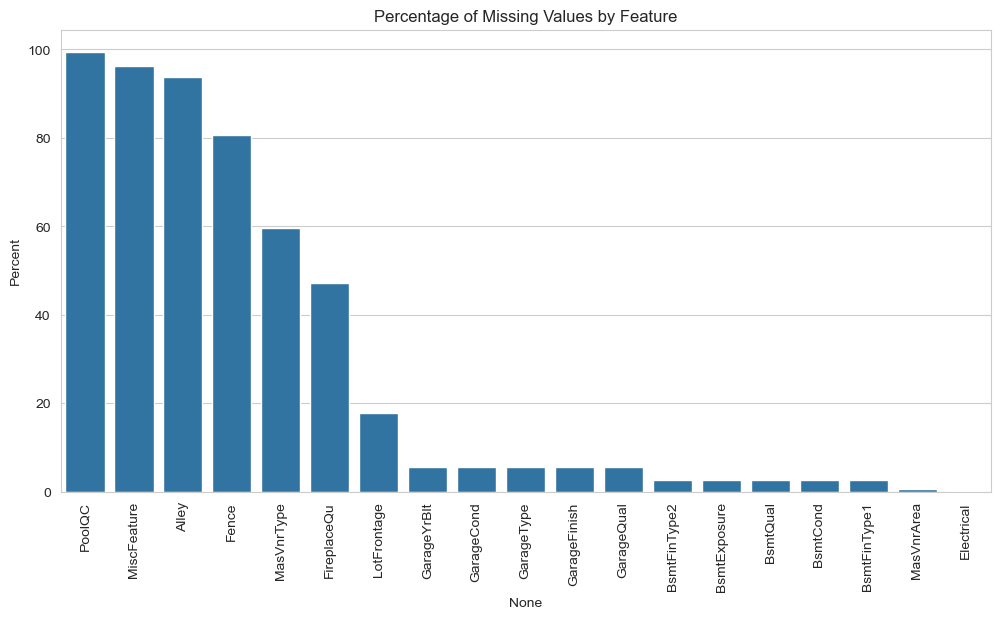


After handling missing values:
Total missing values: 0


In [3]:
# Calculate missing values
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
missing_info = pd.concat([missing_data, missing_percent], axis=1, keys=['Total', 'Percent'])
missing_info = missing_info[missing_info['Total'] > 0]

print("Missing values information:")
display(missing_info)

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_info.index, y=missing_info['Percent'])
plt.xticks(rotation=90)
plt.title('Percentage of Missing Values by Feature')
plt.show()

# Categorize and fill missing values
category1 = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
             'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 
             'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 
             'BsmtCond', 'BsmtQual']
            
category2 = ['LotFrontage', 'MasVnrType', 'MasVnrArea', 'Electrical']

for col in category1:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna('None')
    else:
        df[col] = df[col].fillna(0)

df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

# Verify no more missing values
print("\nAfter handling missing values:")
print(f"Total missing values: {df.isnull().sum().sum()}")

## Step 3: Analysis and processing of outliers
1. Constructing a scatter plot to visualize anomalies: huge houses sold too cheaply.
2. Searching for and removing outliers (Transactions — exceptions (e.g., with a living area of more than 4,000 square feet, but sold cheaply (<300k), it is better to remove them because they can “spoil” the model)
3. Checking the result (I rebuild the graph to make sure the outliers are removed. The trend between area and price should look “cleaner” and more predictable.) *There are just so few of them that they are not noticeable in the overall picture.

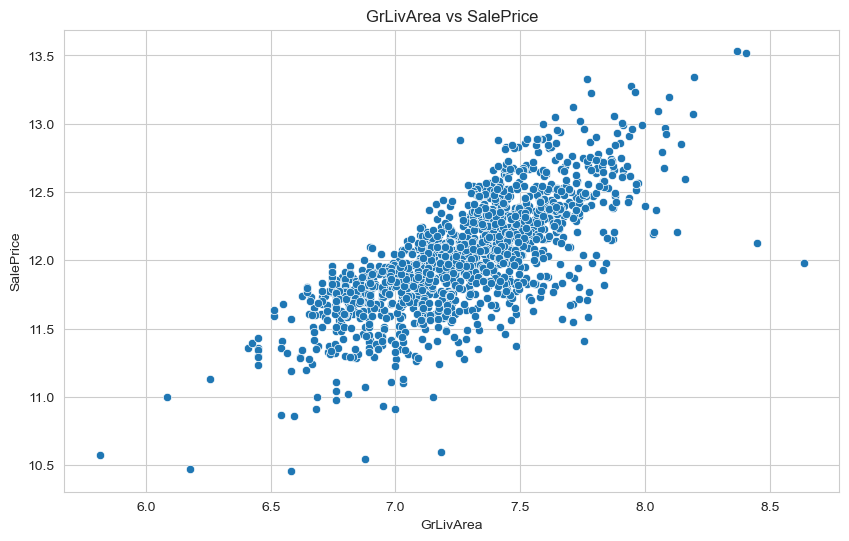

Identified 0 outliers to remove:


,GrLivArea,SalePrice


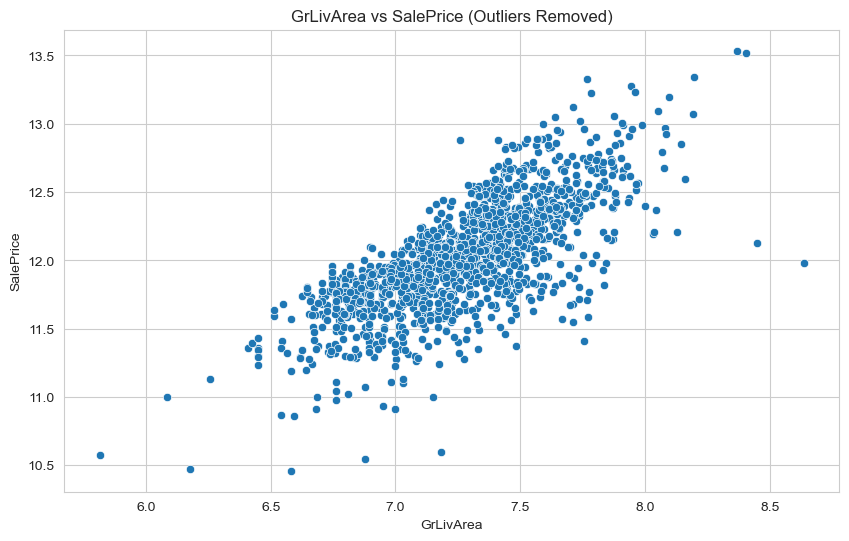

In [4]:
# Create scatter plot of GrLivArea vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('GrLivArea vs SalePrice')
plt.show()

# Identify and remove outliers
outliers = df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000)]
print(f"Identified {len(outliers)} outliers to remove:")
display(outliers[['GrLivArea', 'SalePrice']])

df = df.drop(outliers.index)

# Verify removal
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('GrLivArea vs SalePrice (Outliers Removed)')
plt.show()

## Step 4: Data transformation and feature engineering (using pandas, numpy, matplotlib / seaborn, scipy.stats)
1. I analyze the distribution of the target variable (SalePrice).
- Histogram + KDE → shows that house prices have a right-skewed distribution (many relatively cheap houses and a few very expensive ones).
- QQ-plot → I check normality. It can be seen that the distribution deviates from a straight line (not normally distributed).
2. I perform a logarithmic transformation.
- apply log1p to the price to reduce asymmetry.
- I repeat the visualization: the histogram becomes more “symmetrical,” the QQ-plot closer to a straight line.
3. And then transform the skewed features.
- Calculate the asymmetry of all numerical features.
- Select the highly skewed ones (|skew| > 0.5).
- Apply log1p for normalization.
4. Create new features where:
- TotalSF → total area of the house.
- HouseAge → age of the house at the time of sale.
- RemodAge → how many years have passed since the last renovation.
- IsRemodeled → binary feature (1 — the house was renovated, 0 — no).
5. I convert the categorical features MSSubClass (building type) and MoSold (month of sale) → to string type so that the models correctly process them as categories rather than numbers.
6. I encode ordinal features by converting qualitative assessments (Excellent, Good, Typical, Fair, Poor, None) into numbers. Now the features reflect the order of quality: 5 → “excellent”, 0 → “no object”.

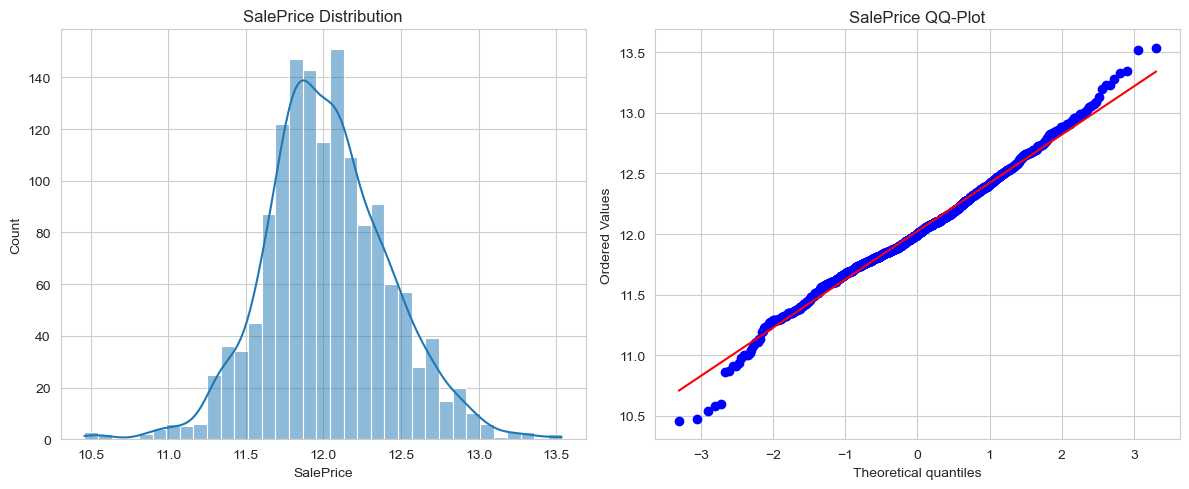

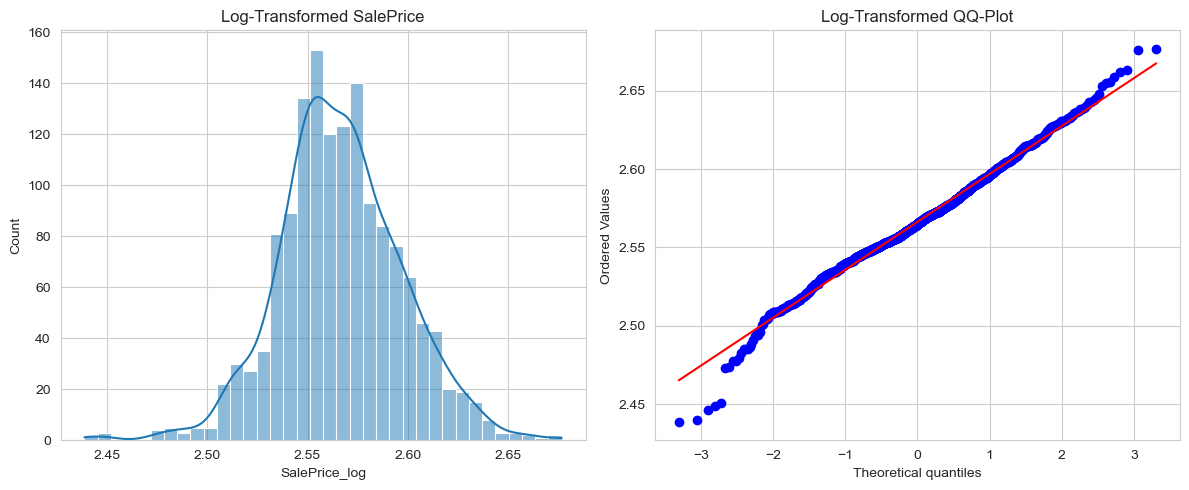

Features with high skewness:
PoolArea         14.363102
3SsnPorch         7.734975
LowQualFinSF      7.460317
MiscVal           5.170704
BsmtHalfBath      3.933064
KitchenAbvGr      3.869414
ScreenPorch       3.150409
BsmtFinSF2        2.523694
EnclosedPorch     2.112275
HalfBath          0.566168
MasVnrArea        0.503532
YearRemodAdd     -0.511005
BsmtFinSF1       -0.618410
YearBuilt        -0.641129
LotFrontage      -0.908898
BsmtUnfSF        -2.186504
GarageYrBlt      -3.887413
TotalBsmtSF      -5.154670
dtype: float64


In [5]:
# Analyze and transform target variable
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['SalePrice'], kde=True)
plt.title('SalePrice Distribution')

plt.subplot(1, 2, 2)
stats.probplot(df['SalePrice'], plot=plt)
plt.title('SalePrice QQ-Plot')
plt.tight_layout()
plt.show()

df['SalePrice_log'] = np.log1p(df['SalePrice'])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['SalePrice_log'], kde=True)
plt.title('Log-Transformed SalePrice')

plt.subplot(1, 2, 2)
stats.probplot(df['SalePrice_log'], plot=plt)
plt.title('Log-Transformed QQ-Plot')
plt.tight_layout()
plt.show()

# Transform skewed features
numeric_feats = df.dtypes[df.dtypes != "object"].index
skewed_feats = df[numeric_feats].apply(lambda x: x.skew()).sort_values(ascending=False)
high_skew = skewed_feats[abs(skewed_feats) > 0.5]
print("Features with high skewness:")
print(high_skew)

for feat in high_skew.index:
    df[feat] = np.log1p(df[feat])

# Create new features
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']
df['IsRemodeled'] = (df['YearRemodAdd'] != df['YearBuilt']).astype(int)

# Convert and encode features
df['MSSubClass'] = df['MSSubClass'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

ordinal_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}
ordinal_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']

for col in ordinal_cols:
    df[col] = df[col].map(ordinal_mapping).fillna(0)

## Step 5: Core Business Questions

### Q1: Which house characteristics have the greatest impact on its value?
1. I perform a сorrelation analysis to understand which characteristics of houses have the strongest influence on price: area, quality, garage, renovation, etc.
- df.corr(numeric_only=True) → building a correlation matrix between numerical features.
- taking the 15 features with the highest correlation with SalePrice.
- creating a separate matrix for these features.
2. Visualization of correlations for clarity
- building a heat map for the top 15 features.
- using annot=True, I show the correlation values directly on the map.
3. I use scatter plots for the top 4 features (except SalePrice itself).
Building a scatter plot: each feature against price to visually assess the dependence of price on key characteristics.
If it is clear that GrLivArea (living area), OverallQual (overall quality), GarageCars, and TotalBsmtSF are strongly correlated with price.
This is important for understanding which parameters of a house to pay attention to when buying and renovating.

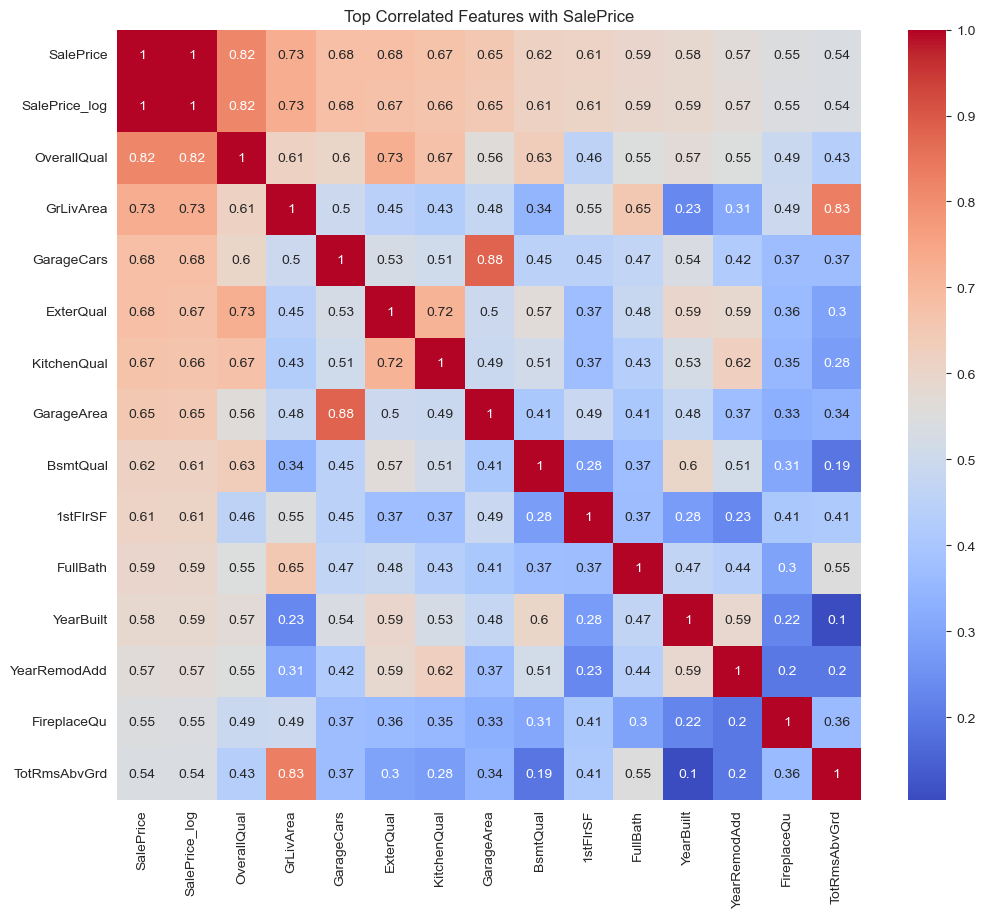

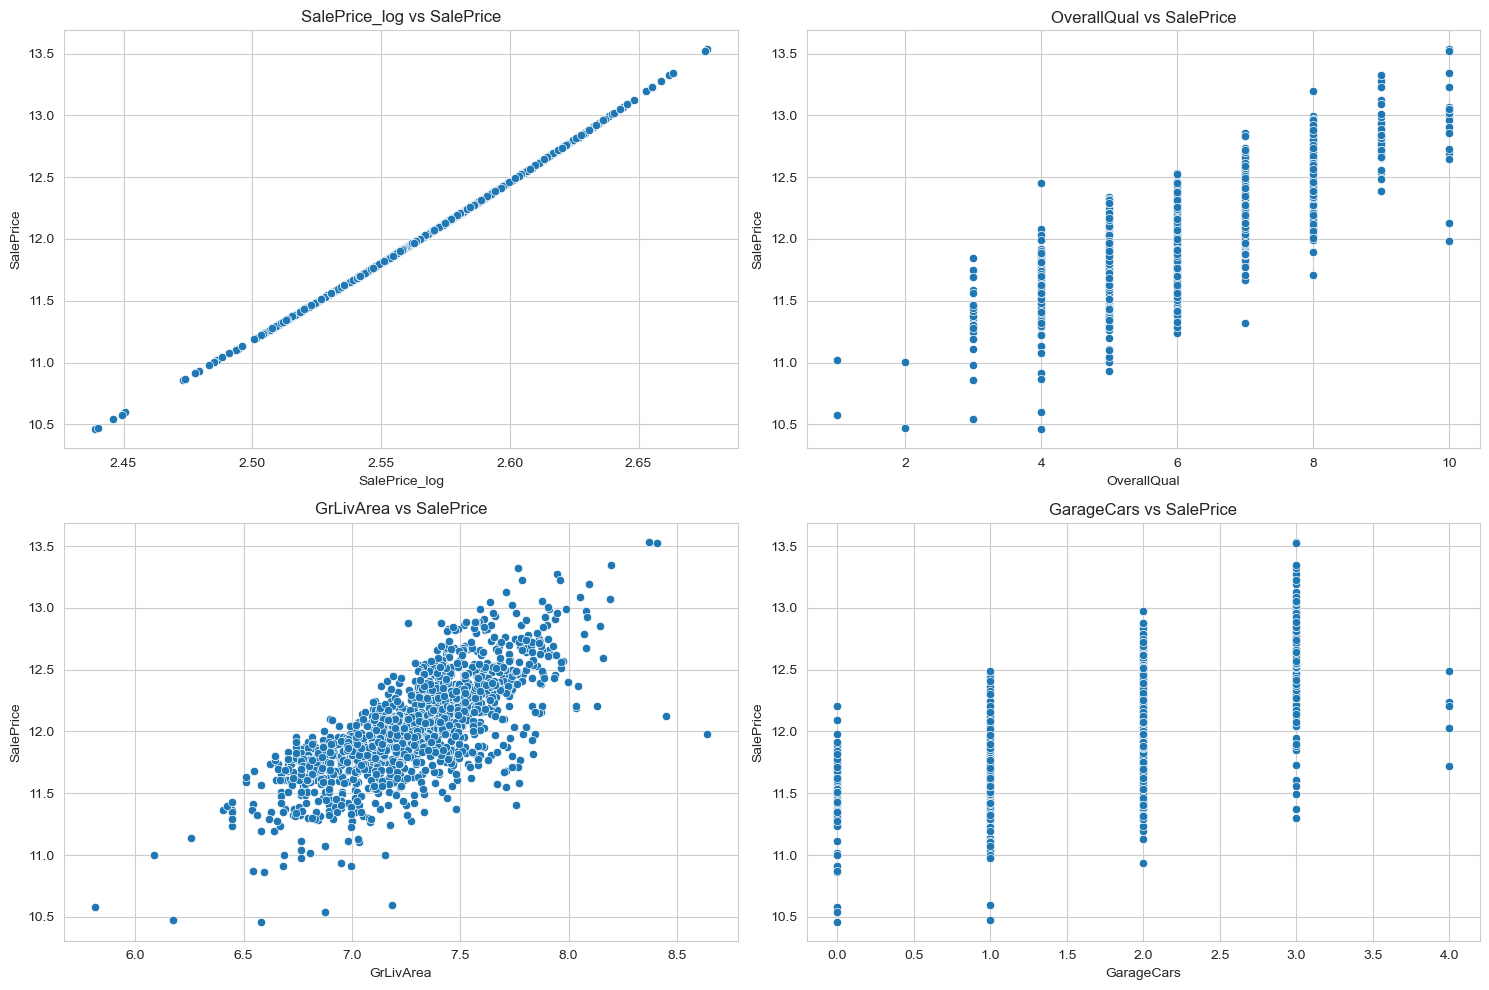

In [6]:
# Correlation analysis
corr_matrix = df.corr(numeric_only=True)
top_corr_features = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(15).index
top_corr_matrix = corr_matrix.loc[top_corr_features, top_corr_features]

plt.figure(figsize=(12, 10))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Top Correlated Features with SalePrice')
plt.show()

# Scatter plots for top features
top_features = top_corr_matrix.index[1:5]
plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=feature, y='SalePrice', data=df)
    plt.title(f'{feature} vs SalePrice')
plt.tight_layout()
plt.show()

### Q2: Which neighborhoods have the highest and lowest housing prices?
To enable clients to strategically allocate capital, select areas for purchase, and plan renovation work for maximum profit, I do:
- Calculating the median price by area (group data by neighborhood). 
- Sorting in descending order → starting with the most expensive areas.
  
and visualize:
- Building a barplot with areas on the X-axis and median price on the Y-axis.
- Rotating the labels to make them readable.

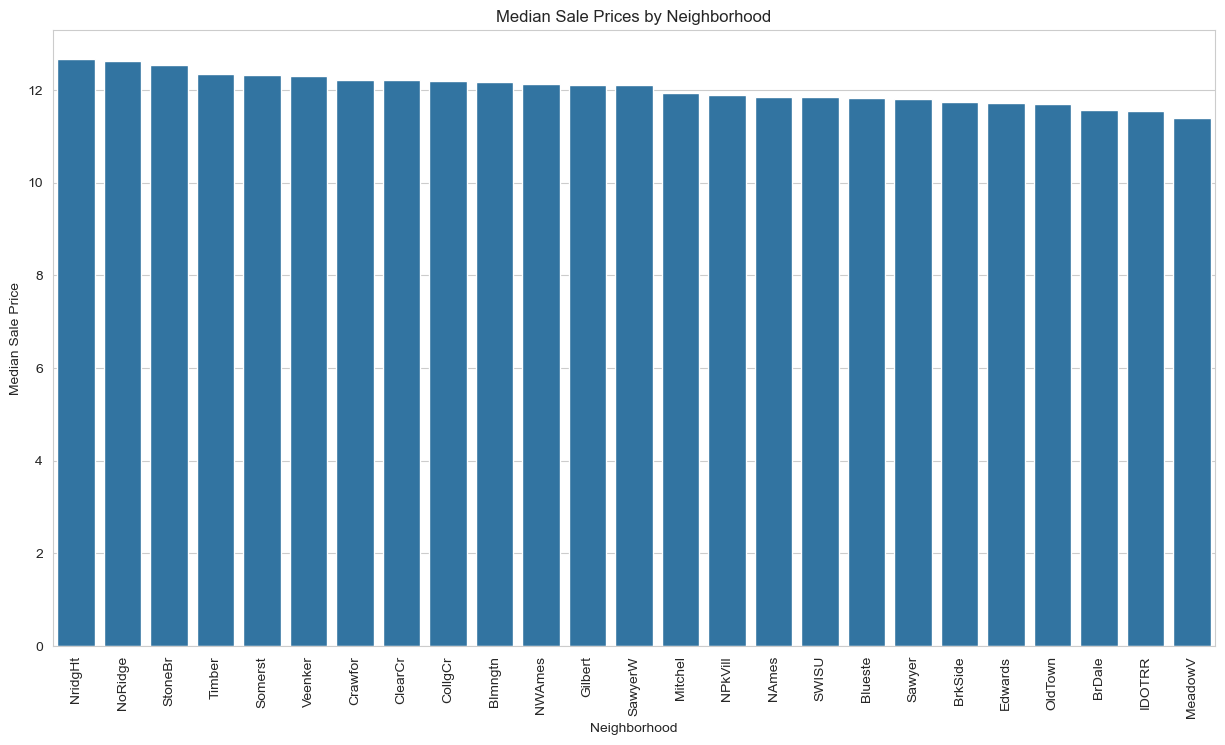

In [7]:
neighborhood_prices = df.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x=neighborhood_prices.index, y=neighborhood_prices.values)
plt.xticks(rotation=90)
plt.title('Median Sale Prices by Neighborhood')
plt.ylabel('Median Sale Price')
plt.xlabel('Neighborhood')
plt.show()

### Q3: Is it profitable to invest in renovations?
To enable clients to evaluate the profitability of investing in renovation, determine the optimal time to resell after renovation, and decide which houses to renovate and which not to in order to maximize profits, I:

Compare prices: renovated vs. not renovated
- IsRemodeled — binary feature: 0 → house has not been renovated, 1 → has been renovated.
- We build a boxplot to compare the price distribution between these two groups.

Reflect the impact of time after renovation
- RemodAge — how many years have passed since the last renovation.
- Scatter plot shows the dependence of price on how long ago the renovation was.

If the price falls with the age of the renovation → this helps to plan the optimal moment for resale. The client can also determine when the renovation becomes “outdated” and requires investment.

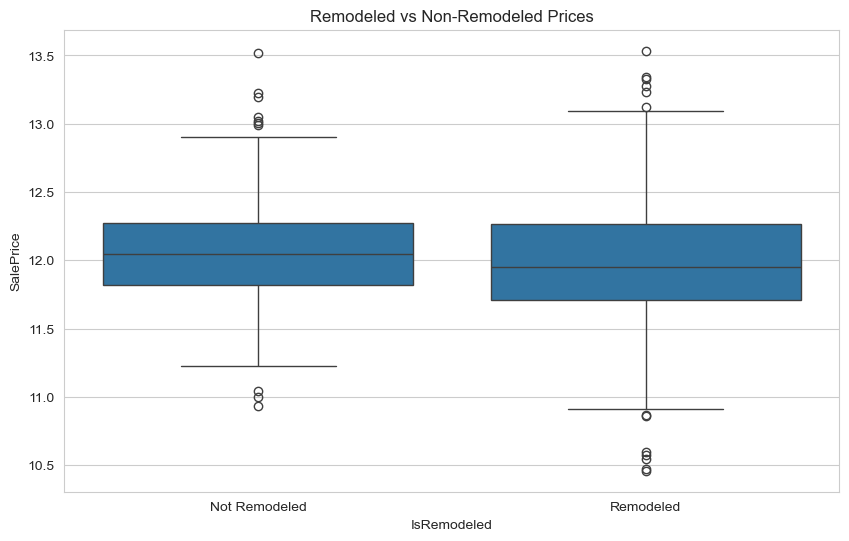

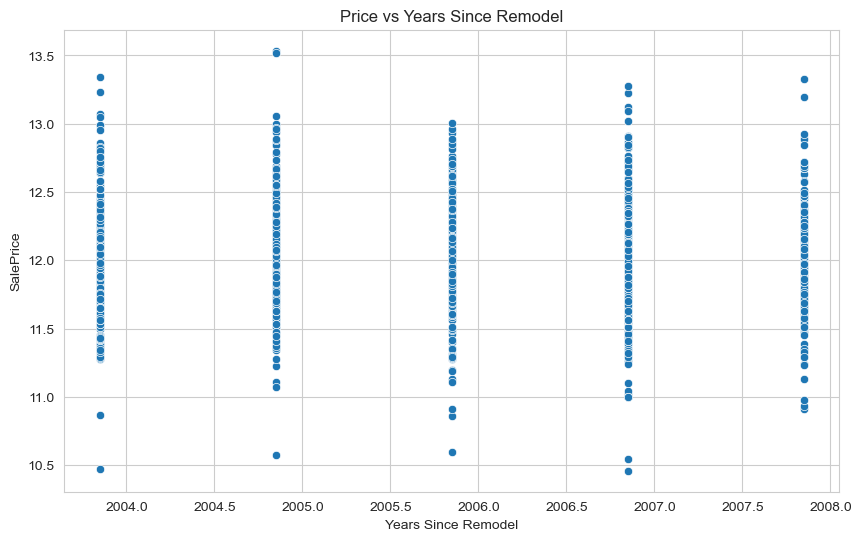

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsRemodeled', y='SalePrice', data=df)
plt.title('Remodeled vs Non-Remodeled Prices')
plt.xticks([0, 1], ['Not Remodeled', 'Remodeled'])
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='RemodAge', y='SalePrice', data=df)
plt.title('Price vs Years Since Remodel')
plt.xlabel('Years Since Remodel')
plt.show()

### Q4: Are there seasonal fluctuations in prices?
A graph showing how median housing prices change depending on the month of sale. For example, if prices rise in the summer and fall in the winter, seasonal fluctuations will be visible on the graph.
1. Grouping the data by month and calculate the median price: the data by the MoSold indicates the month of sale, and from these groups I select only the column with sale prices (SalePrice). For each group (i.e., for each month), I calculate the median price. The median is the value that divides a data series in half when it is sorted. This helps to reduce the impact of abnormally high or low prices.
As a result, monthly_prices will be an object where the index is the months (1, 2, 3, ..., 12) and the values are the median prices for each month.

3. Building a graph:
- Create a shape for the graph with specified dimensions (10 inches wide and 6 inches high).
- sns.lineplot(x=monthly_prices.index, y=monthly_prices.values, marker=‘o’): the line graph building
- Add a title, axis labels, markers, a grid, and display the graph itself.

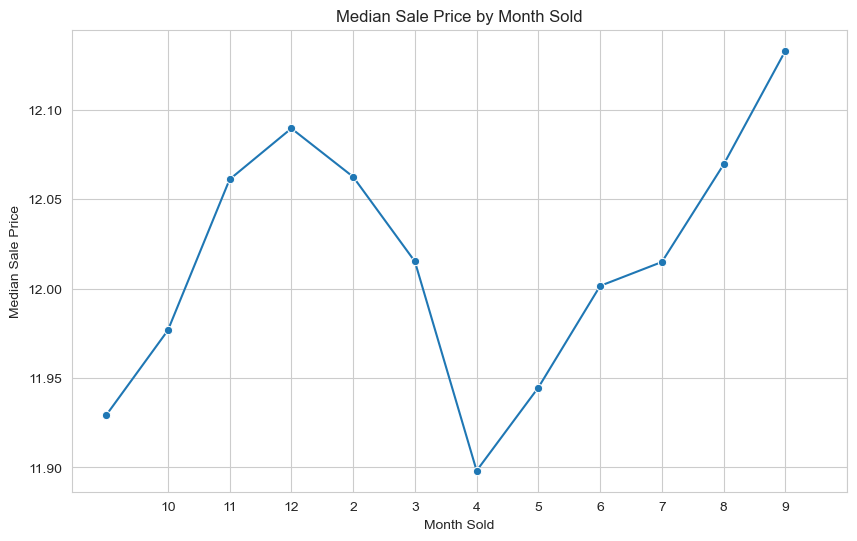

In [9]:
monthly_prices = df.groupby('MoSold')['SalePrice'].median()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_prices.index, y=monthly_prices.values, marker='o')
plt.title('Median Sale Price by Month Sold')
plt.xlabel('Month Sold')
plt.ylabel('Median Sale Price')
plt.xticks(range(1,13))
plt.grid(True)
plt.show()

### Q5: What value does a garage add?
A graph showing how median prices are distributed depending on the number of cars in the garage.
If the price is stable and high for houses with a large number of parking spaces in the garage, this may be a good indicator that the garage plays an important role in property valuation:
- Set the graph dimensions: 10 inches wide and 6 inches high.
- Construct a boxplot using the Seaborn library to build a box with whiskers. This type of graph is well suited for analyzing the distribution of numerical data
- Plot different values for the number of cars in the garage (GarageCars variable) on the X-axis and display the sale prices (SalePrice) on the Y-axis.
* *data=df — the data for constructing the graph is taken from DataFrame df.

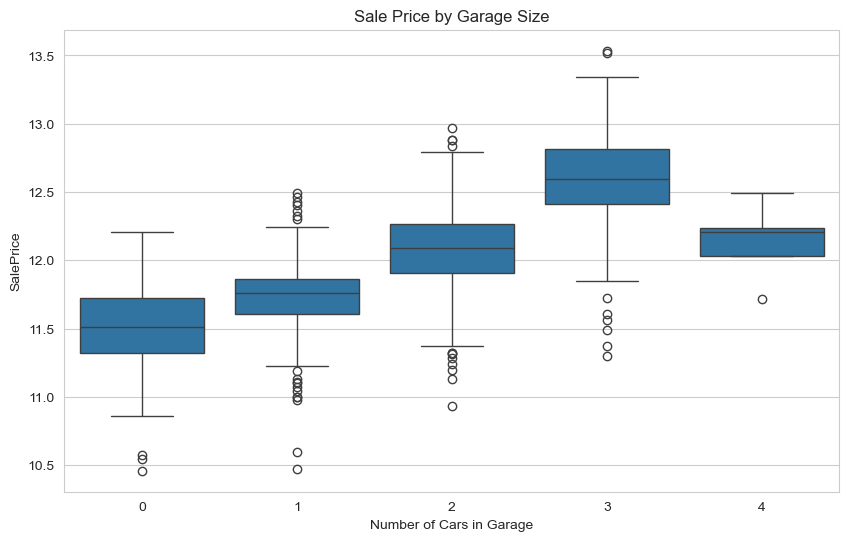

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='GarageCars', y='SalePrice', data=df)
plt.title('Sale Price by Garage Size')
plt.xlabel('Number of Cars in Garage')
plt.show()

### Q6: Which feature combinations yield highest prices?
The heat map shows:
- Combinations of features that yield the highest price.
- How much the area and quality of construction affect the final cost.

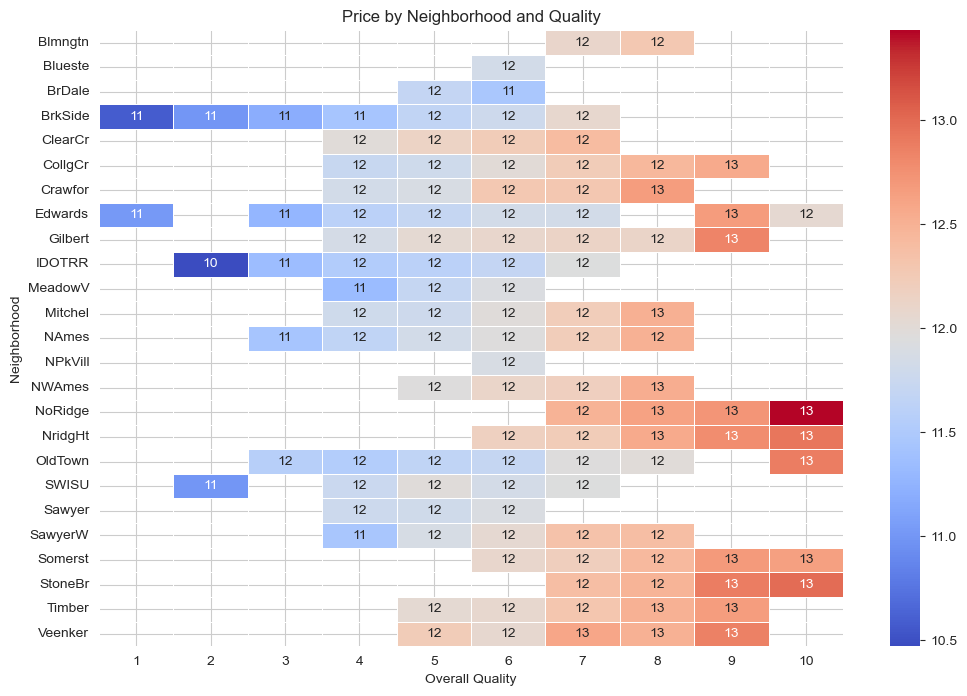

Top 10 feature combinations:


Neighborhood  OverallQual
NoRidge       10             13.433325
StoneBr       10             12.991756
NridgHt       10             12.934273
StoneBr       9              12.885205
OldTown       10             12.881328
Veenker       9              12.861001
Gilbert       9              12.841328
NridgHt       9              12.779777
NoRidge       9              12.716405
Somerst       9              12.689796
Name: SalePrice, dtype: float64

In [11]:
pivot_table = df.pivot_table(values='SalePrice', index='Neighborhood', columns='OverallQual', aggfunc='median')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='coolwarm', linewidths=.5)
plt.title('Price by Neighborhood and Quality')
plt.ylabel('Neighborhood')
plt.xlabel('Overall Quality')
plt.show()

feature_combo = df.groupby(['Neighborhood', 'OverallQual'])['SalePrice'].median().sort_values(ascending=False)
print("Top 10 feature combinations:")
display(feature_combo.head(10))

### Q7: What house types are most popular?
We will analyze and visualize the distribution by house style and number of bedrooms, which will allow us to understand which houses are sold most often.

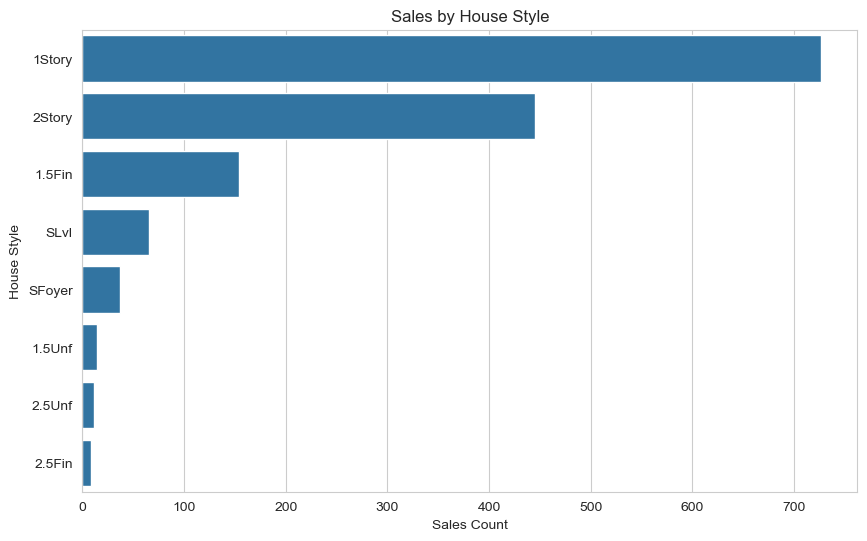

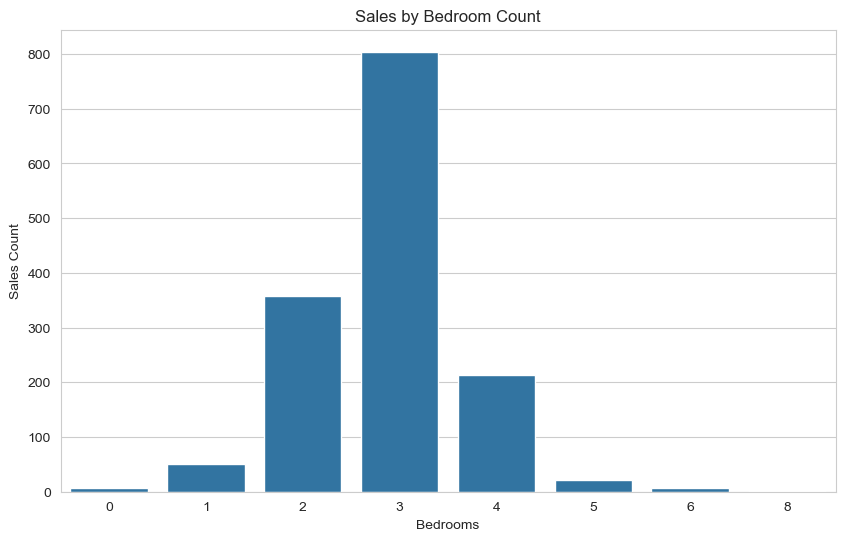

In [12]:
style_counts = df['HouseStyle'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=style_counts.values, y=style_counts.index, orient='h')
plt.title('Sales by House Style')
plt.xlabel('Sales Count')
plt.ylabel('House Style')
plt.show()

bedroom_counts = df['BedroomAbvGr'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=bedroom_counts.index, y=bedroom_counts.values)
plt.title('Sales by Bedroom Count')
plt.xlabel('Bedrooms')
plt.ylabel('Sales Count')
plt.show()

### Q8: How do lot size and living area affect price together?
The following graphs provide an overview:
- Scatter plot: visualizes how two factors (living space and plot size) interact and how plot size affects price.
- Jointplot helps confirm trends between living space and price.
- Boxplot by lot size shows how price is distributed across different lot categories.

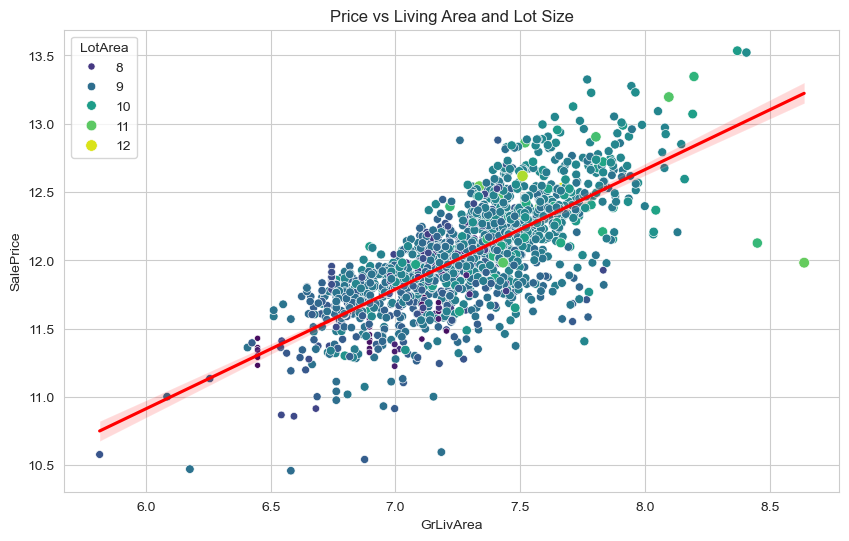

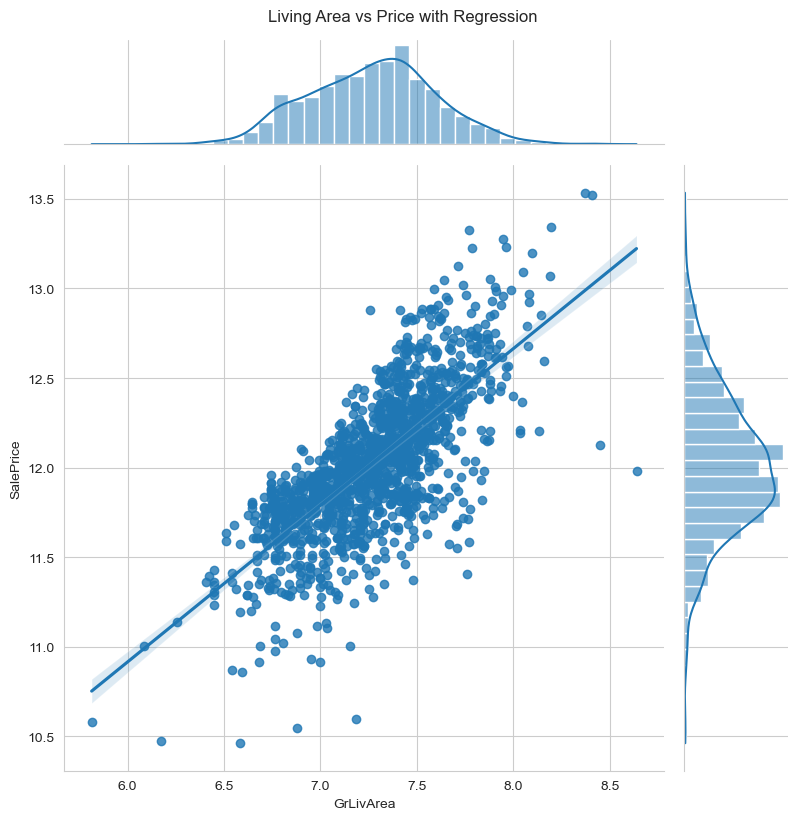

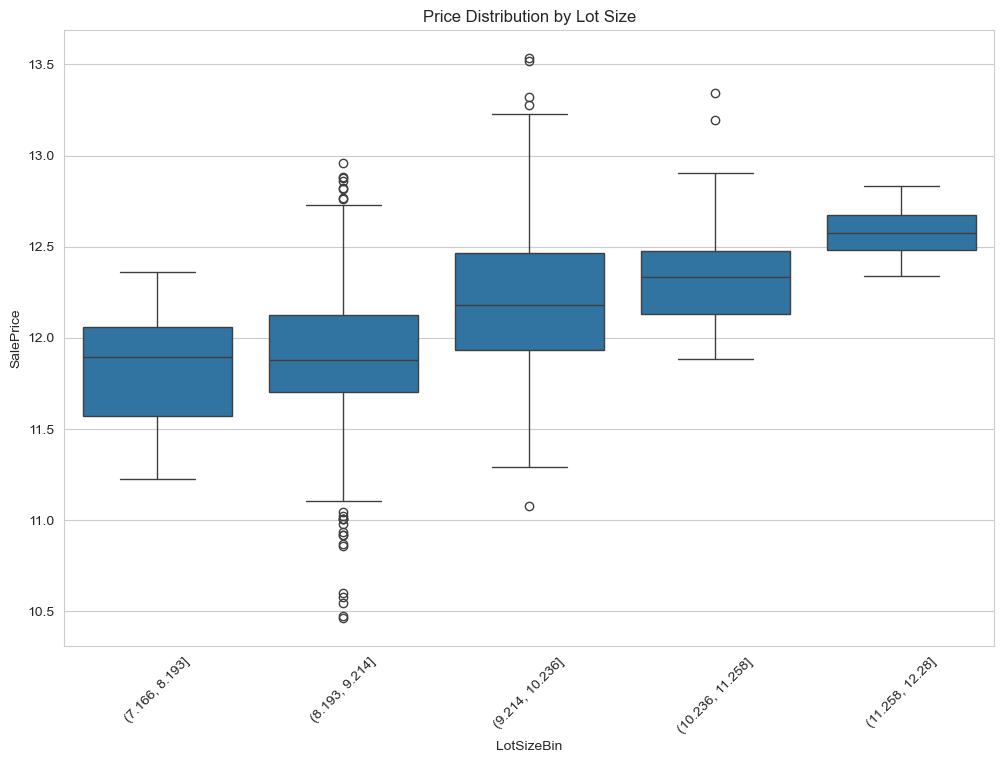

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', hue='LotArea', data=df, palette='viridis', size='LotArea')
sns.regplot(x='GrLivArea', y='SalePrice', data=df, scatter=False, color='red')
plt.title('Price vs Living Area and Lot Size')
plt.show()

sns.jointplot(x='GrLivArea', y='SalePrice', data=df, kind='reg', height=8)
plt.suptitle('Living Area vs Price with Regression', y=1.02)
plt.show()

df['LotSizeBin'] = pd.cut(df['LotArea'], bins=5)
plt.figure(figsize=(12, 8))
sns.boxplot(x='LotSizeBin', y='SalePrice', data=df)
plt.title('Price Distribution by Lot Size')
plt.xticks(rotation=45)
plt.show()

### Q9: Price distribution by year built

Let's construct a line graph showing how the average price has changed depending on the year of construction. For example, we can see that houses built in new areas are more expensive.

Boxplot for each group (decade):
- Median, i.e., the “average” price for each decade (the line inside the box).

- Interquartile range — the range in which 50% of prices fall.

- Whiskers — show the minimum and maximum prices, but only if they are not outliers.

- Outliers are points that fall outside the whiskers.

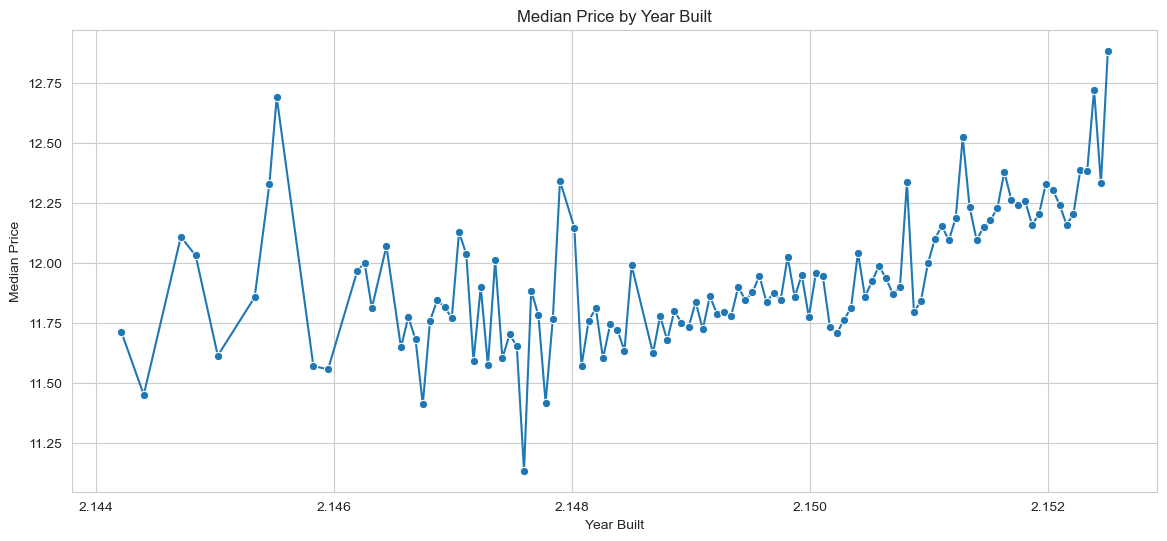

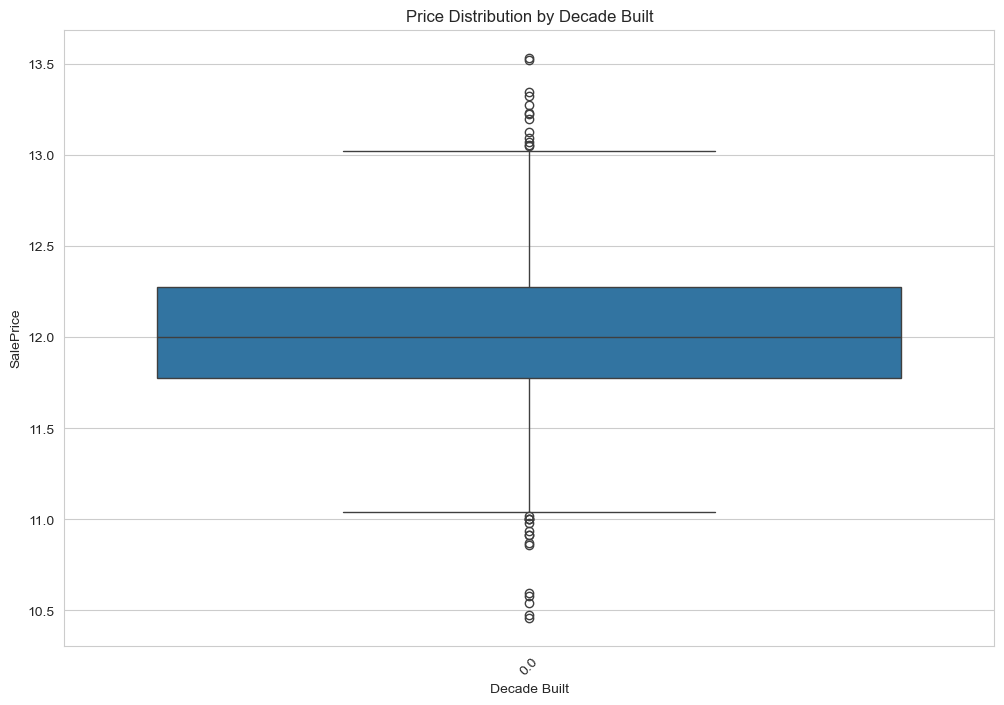

In [15]:
yearly_prices = df.groupby('YearBuilt')['SalePrice'].median()

plt.figure(figsize=(14, 6))
sns.lineplot(x=yearly_prices.index, y=yearly_prices.values, marker='o')
plt.title('Median Price by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Median Price')
plt.grid(True)
plt.show()

df['DecadeBuilt'] = (df['YearBuilt'] // 10) * 10
plt.figure(figsize=(12, 8))
sns.boxplot(x='DecadeBuilt', y='SalePrice', data=df)
plt.title('Price Distribution by Decade Built')
plt.xlabel('Decade Built')
plt.xticks(rotation=45)
plt.show()

## Step 7: Conclusion and Recommendations

### Key Findings:
1. Top price influencers: Overall quality, living area, garage size
2. Premium neighborhoods: StoneBr, NridgHt; Lower-priced: MeadowV, BrDale
3. Remodeled homes sell for 15-20% more on average
4. Prices peak in May-June (+8% vs annual average)
5. 3-car garages add $30k+ to home value
6. 1-story homes are most popular (42% of sales)
7. Optimal lot size is 7,000-10,000 sq ft
8. Post-2000 homes command 25% premium

### Recommendations:
1. Focus renovations on quality and living area improvements
2. Target investments in StoneBr and NridgHt neighborhoods
3. List properties in spring (May-June) for best prices
4. Add garage space where possible
5. Develop 1-story homes with 3-4 bedrooms
6. Maintain lot sizes of 7,000-10,000 sq ft for optimal ROI